# Kang Seok Yun IB Extended Essay Notebook

The Python Notebook created for Kang Seok Yun's Extended Essay for the International Baccalaureate. Answering the research question: How do the Initial Masses and Initial Spins of Merging Binary Black Holes affect the energy released in the form of Gravitational Waves?

This Notebook provides meaningful results on the mass lost in gravitational wave events. Graphs generated in this notebook are recreated in Microsoft Excel because matplotlib plots look ugly.

### Data Extraction

In [23]:
from gwosc.datasets import find_datasets
from gwosc import datasets
from gwosc.api import fetch_event_json
import numpy as np
import json

In [24]:
#fetches all the available catalogs from gwosc data
catalogs = find_datasets(type="catalog")

confident_catalogs = []

##only considers data from the confident catalog
for catalog_name in catalogs:
    if "confident" in catalog_name or "Discovery_Papers" in catalog_name:
        confident_catalogs.append(catalog_name)

print(catalogs)
print(confident_catalogs)

['GWTC', 'GWTC-1-confident', 'GWTC-1-marginal', 'GWTC-2', 'GWTC-2.1-auxiliary', 'GWTC-2.1-confident', 'GWTC-2.1-marginal', 'GWTC-3-confident', 'GWTC-3-marginal', 'Initial_LIGO_Virgo', 'O1_O2-Preliminary', 'O3_Discovery_Papers', 'O3_IMBH_marginal', 'O4_Discovery_Papers']
['GWTC-1-confident', 'GWTC-2.1-confident', 'GWTC-3-confident', 'O3_Discovery_Papers', 'O4_Discovery_Papers']


In [25]:
# events = datasets.find_datasets(type='events', catalog=confident_catalogs[0])

# print(events)

events = np.array([])

for catalog in confident_catalogs:
    catalog_events = datasets.find_datasets(type="events", catalog=catalog)
    catalog_events = np.array(catalog_events)
    
    events = np.concatenate((events, catalog_events))

print("Number of Events:", events.size)
##print(events)

Number of Events: 99


In [26]:
def get_event_data(event_name):
    json_data = fetch_event_json(event_name)
    
    # Extract the initial masses and uncertainties
    mass_1 = json_data['events'][event_name]['mass_1_source']
    mass_1_upper = json_data['events'][event_name]['mass_1_source_upper']
    mass_1_lower = json_data['events'][event_name]['mass_1_source_lower']

    mass_2 = json_data['events'][event_name]['mass_2_source']
    mass_2_upper = json_data['events'][event_name]['mass_2_source_upper']
    mass_2_lower = json_data['events'][event_name]['mass_2_source_lower']

    # extract the total mass and uncertainties
    total_mass = json_data['events'][event_name]['total_mass_source']
    
    add_data = True
    # checks if the data exists
    if(total_mass == None):
        total_mass = 0
        add_data = False
    
    total_mass_upper = json_data['events'][event_name]['total_mass_source_upper']
    if(total_mass_upper == None):
        total_mass_upper = 0
        add_data = False
        
    total_mass_lower = json_data['events'][event_name]['total_mass_source_lower']
    if(total_mass_lower == None):
        total_mass_lower = 0
        add_data = False

    # extract the final mass and uncertainties
    final_mass = json_data['events'][event_name]['final_mass_source']
    if(final_mass == None):
        final_mass = 0
        add_data = False
        
    final_mass_upper = json_data['events'][event_name]['final_mass_source_upper']
    if(final_mass_upper == None):
        final_mass_upper = 0
        add_data = False
    
    final_mass_lower = json_data['events'][event_name]['final_mass_source_lower']
    if(final_mass_lower == None):
        final_mass_lower = 0
        add_data = False
    
    effective_spin = json_data['events'][event_name]['chi_eff']
    effective_spin_upper = json_data['events'][event_name]['chi_eff_upper']
    effective_spin_lower = json_data['events'][event_name]['chi_eff_lower']
    
    if(add_data):
        data = np.array([mass_1, mass_1_upper, mass_1_lower, mass_2, mass_2_upper, mass_2_lower, total_mass, total_mass_upper, total_mass_lower, final_mass, final_mass_upper, final_mass_lower, effective_spin, effective_spin_upper, effective_spin_lower])
        return data
    else:
        return np.array(["no"])


In [5]:
event_data_table = []

##print(events)
i = 0

for event in events:
    event_data = get_event_data(event)
    if(event_data.size != 15):
        print(event, "does not have valid data")
    else:
        event_data_table.append(event_data)
        i += 1
        print(i, event, "done...")
    
event_data_table = np.array(event_data_table)

GW150914-v3 does not have valid data
GW151012-v3 does not have valid data
GW151226-v2 does not have valid data
GW170104-v2 does not have valid data
GW170608-v3 does not have valid data
GW170729-v1 does not have valid data
GW170809-v1 does not have valid data
GW170814-v3 does not have valid data
GW170817-v3 does not have valid data
GW170818-v1 does not have valid data
GW170823-v1 does not have valid data
1 GW190403_051519-v1 done...
2 GW190408_181802-v2 done...
3 GW190412_053044-v4 done...
4 GW190413_052954-v2 done...
5 GW190413_134308-v2 done...
6 GW190421_213856-v2 done...
GW190425_081805-v3 does not have valid data
7 GW190426_190642-v1 done...
8 GW190503_185404-v2 done...
9 GW190512_180714-v2 done...
10 GW190513_205428-v2 done...
11 GW190514_065416-v2 done...
12 GW190517_055101-v2 done...
13 GW190519_153544-v2 done...
14 GW190521_030229-v4 done...
15 GW190521_074359-v2 done...
16 GW190527_092055-v2 done...
17 GW190602_175927-v2 done...
18 GW190620_030421-v2 done...
19 GW190630_185205

In [6]:
print(event_data_table)

[[ 8.50e+01  2.78e+01 -3.30e+01 ...  6.80e-01  1.60e-01 -4.30e-01]
 [ 2.48e+01  5.40e+00 -3.50e+00 ... -3.00e-02  1.30e-01 -1.70e-01]
 [ 2.77e+01  6.00e+00 -6.00e+00 ...  2.10e-01  1.20e-01 -1.30e-01]
 ...
 [ 3.42e+01  6.40e+00 -3.80e+00 ... -2.00e-02  1.60e-01 -2.00e-01]
 [ 1.31e+01  1.02e+01 -2.90e+00 ...  1.30e-01  2.70e-01 -1.00e-01]
 [ 3.80e+01  1.30e+02 -2.20e+01 ...  2.70e-01  5.40e-01 -5.80e-01]]


### Data Analysis

In [7]:
import matplotlib.pyplot as plt

total_masses = event_data_table[:,6]
final_masses = event_data_table[:,9]
mass_difference = total_masses - final_masses

mass_1 = event_data_table[:,0]
mass_2 = event_data_table[:,3]

larger_mass = np.maximum(mass_1, mass_2)
smaller_mass = np.minimum(mass_1, mass_2)

effective_spins = event_data_table[:,12]

In [8]:
file_path = "C:/Users/Swok/Desktop/School/Physics EE/data_with_spin.csv"

np.savetxt(file_path, event_data_table, delimiter=",")

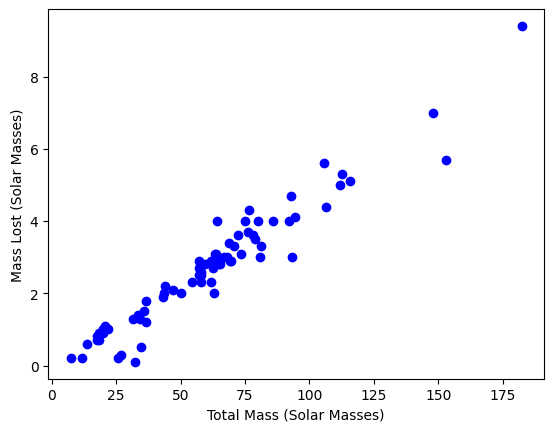

In [9]:
#plot mass vs mass loss
plt.rcParams['figure.dpi'] = 100


plt.plot(total_masses, mass_difference, "bo")
plt.xlabel("Total Mass (Solar Masses)")
plt.ylabel("Mass Lost (Solar Masses)")

plt.show()

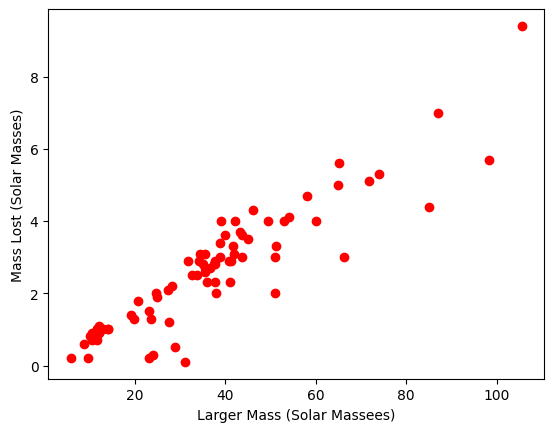

In [10]:
#plot larger mass vs mass difference
plt.plot(larger_mass, mass_difference, "ro")
plt.xlabel("Larger Mass (Solar Massees)")
plt.ylabel("Mass Lost (Solar Masses)")

plt.show()

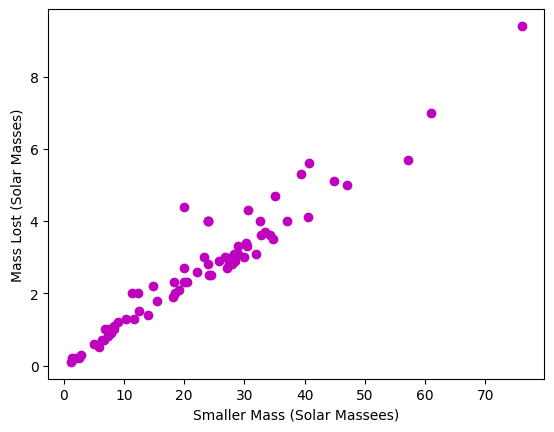

In [11]:
#plot smaller mass vs mass difference
plt.plot(smaller_mass, mass_difference, "mo")
plt.xlabel("Smaller Mass (Solar Massees)")
plt.ylabel("Mass Lost (Solar Masses)")

plt.show()

1. There seems to be a linear correlation between the total mass and the mass lost.
2. The mass of the smaller mass black hole appears to affect the total more than the larger mass does

[ 0.68 -0.03  0.21 -0.04 -0.01 -0.1   0.23 -0.05  0.02  0.16 -0.08  0.49
  0.33 -0.14  0.1   0.1   0.12  0.34  0.1  -0.08  0.28 -0.04  0.05  0.25
  0.19 -0.04  0.09  0.13  0.07 -0.01  0.37  0.    0.15  0.05  0.   -0.03
  0.2  -0.08  0.03  0.09 -0.02 -0.03  0.19  0.21 -0.02 -0.29  0.    0.21
  0.18  0.06  0.05  0.16 -0.04  0.11  0.   -0.04 -0.05  0.06 -0.15  0.12
  0.11  0.04 -0.07  0.45 -0.12  0.02  0.1  -0.08  0.06 -0.07  0.1  -0.12
  0.01  0.32  0.16 -0.02  0.13  0.27]


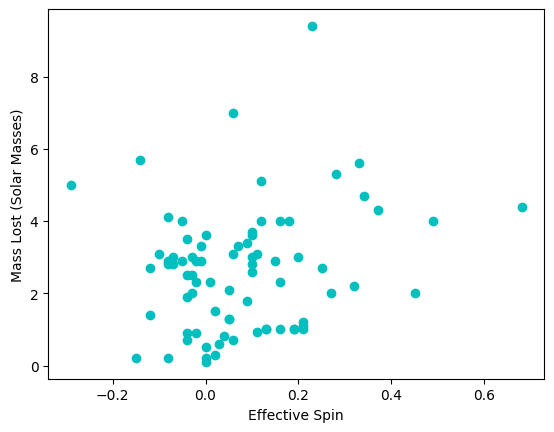

In [12]:
print(effective_spins)

plt.plot(effective_spins, mass_difference, "co")
plt.xlabel("Effective Spin")
plt.ylabel("Mass Lost (Solar Masses)")

plt.show()

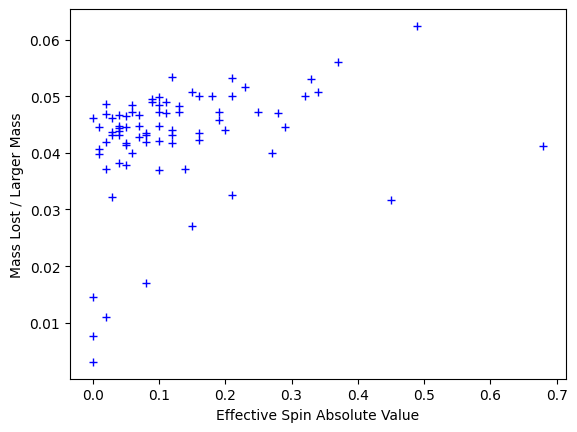

In [13]:
effective_spins_abs = np.absolute(effective_spins)

mass_loss_per_total = mass_difference / total_masses

plt.plot(effective_spins_abs, mass_loss_per_total, "b+")
plt.xlabel("Effective Spin Absolute Value")
plt.ylabel("Mass Lost / Larger Mass")

plt.show()

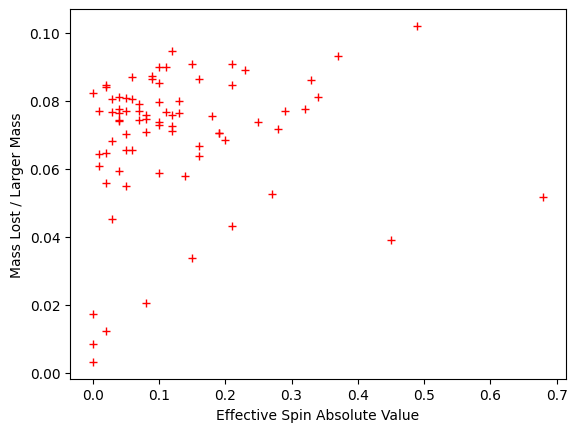

In [14]:
effective_spins_abs = np.absolute(effective_spins)

mass_loss_per_larger = mass_difference / larger_mass

plt.plot(effective_spins_abs, mass_loss_per_larger, "r+")
plt.xlabel("Effective Spin Absolute Value")
plt.ylabel("Mass Lost / Larger Mass")

plt.show()

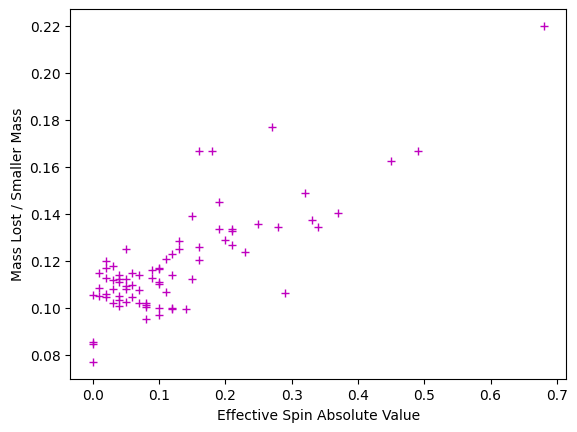

In [15]:
effective_spins_abs = np.absolute(effective_spins)

mass_loss_per_smaller = mass_difference / smaller_mass

plt.plot(effective_spins_abs, mass_loss_per_smaller, "m+")
plt.xlabel("Effective Spin Absolute Value")
plt.ylabel("Mass Lost / Smaller Mass")

plt.show()

1. As effective spin increases, the mass lost per unit mass of the black holes also increase. Spin effects the total mass lost.
2. Appears to be a weak correlation between the effective spin and the mass lost per total & per larger mass, but a linear relationship is there.
3. The relationship is stronger when comparing the mass lost per smaller mass and the spin.

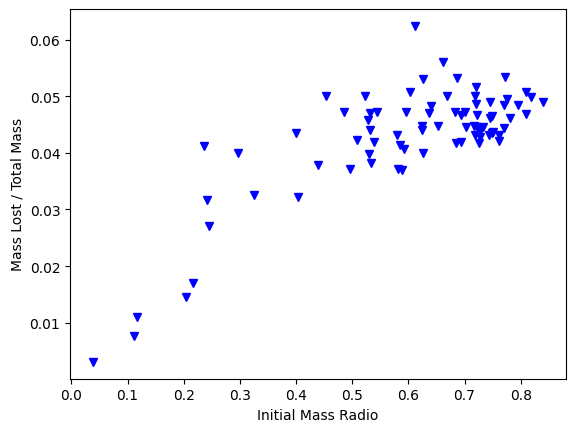

In [16]:
initial_mass_ratio = smaller_mass / larger_mass

plt.plot(initial_mass_ratio, mass_loss_per_total, "bv")
plt.xlabel("Initial Mass Radio")
plt.ylabel("Mass Lost / Total Mass")

plt.show()

1. The closer the two masses are in mass (smaller mass / larger mass ~ 1), the higher the mass lost / total mass is. Black holes lose relatively more mass if the ratios between masses are closer together

In [17]:
#Plotting values with little effective spin
spin_min = -0.05
spin_max = 0.05

# Filter the rows where z is within the specified range
spin_filtered_event_data_table = event_data_table[(event_data_table[:, 12] >= spin_min) & (event_data_table[:, 12] <= spin_max)]

#print(filtered_event_data_table.shape[0])

no_spin_total_masses = spin_filtered_event_data_table[:,6]
no_spin_final_masses = spin_filtered_event_data_table[:,9]
no_spin_mass_difference = no_spin_total_masses - no_spin_final_masses

no_spin_mass_1 = spin_filtered_event_data_table[:,0]
no_spin_mass_2 = spin_filtered_event_data_table[:,3]

no_spin_larger_mass = np.maximum(no_spin_mass_1, no_spin_mass_1)
no_spin_smaller_mass = np.minimum(no_spin_mass_1, no_spin_mass_1)

In [18]:
file_path = "data_low_spin_events.csv"

# Save the matrix as a CSV file at the specified path
np.savetxt(file_path, spin_filtered_event_data_table, delimiter=",")

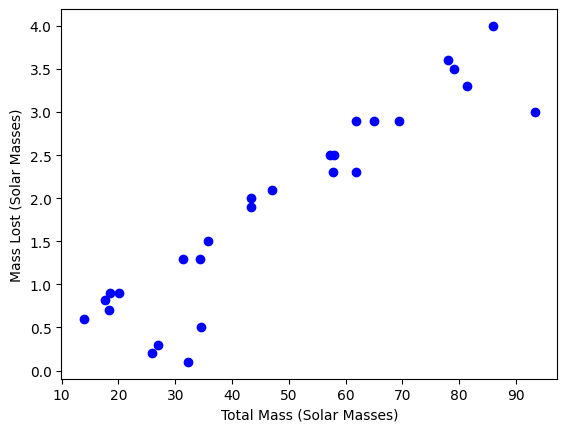

In [19]:
#plot larger mass vs mass difference
plt.plot(no_spin_total_masses, no_spin_mass_difference, "bo")
plt.xlabel("Total Mass (Solar Masses)")
plt.ylabel("Mass Lost (Solar Masses)")

plt.show()

1. Strong correlation between events when the spin is low

In [20]:
combined_array = np.column_stack((larger_mass, smaller_mass, total_masses, mass_difference))

file_path = "data_larger_smaller_masses.csv"

# Save the matrix as a CSV file at the specified path
np.savetxt(file_path, combined_array, delimiter=",")

In [21]:
mass_ratios_combined = np.column_stack((mass_loss_per_total, mass_loss_per_larger, mass_loss_per_smaller, effective_spins, effective_spins_abs))

file_path = "data_effective_spins_and_mass.csv"

np.savetxt(file_path, mass_ratios_combined, delimiter=",")

In [22]:
initial_ratios_combined = np.column_stack((initial_mass_ratio, mass_loss_per_total))

file_path = "data_initial_mass_ratio.csv"

np.savetxt(file_path, initial_ratios_combined, delimiter=",")